### 데이터 로드 및 결측치 처리

In [101]:
import pandas as pd

train_data = pd.read_csv("data/train.csv")
train_data.drop(columns=["Id"], inplace=True)

dep_var = "SalePrice"
ind_vars = []
numerical_vars = []
categorical_vars = []

for col in train_data.columns:
    ind_vars.append(col)
    if train_data[col].dtype == "object":
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)

ind_vars.remove(dep_var)
print(numerical_vars)
print(categorical_vars)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

In [102]:
null_true_cols = []
for col in train_data.columns:
    null_cnt = len(train_data[train_data[col].isnull() == True])
    if col in numerical_vars and null_cnt > 0:
        print("결측치 {} : {}".format(col, null_cnt))
        null_true_cols.append(col)
null_true_cols

for col in null_true_cols:
    this_mean = train_data[col].mean()
    train_data.loc[(train_data[col].isnull()), col] = this_mean

결측치 LotFrontage : 259
결측치 MasVnrArea : 8
결측치 GarageYrBlt : 81


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

### 이상치 체크

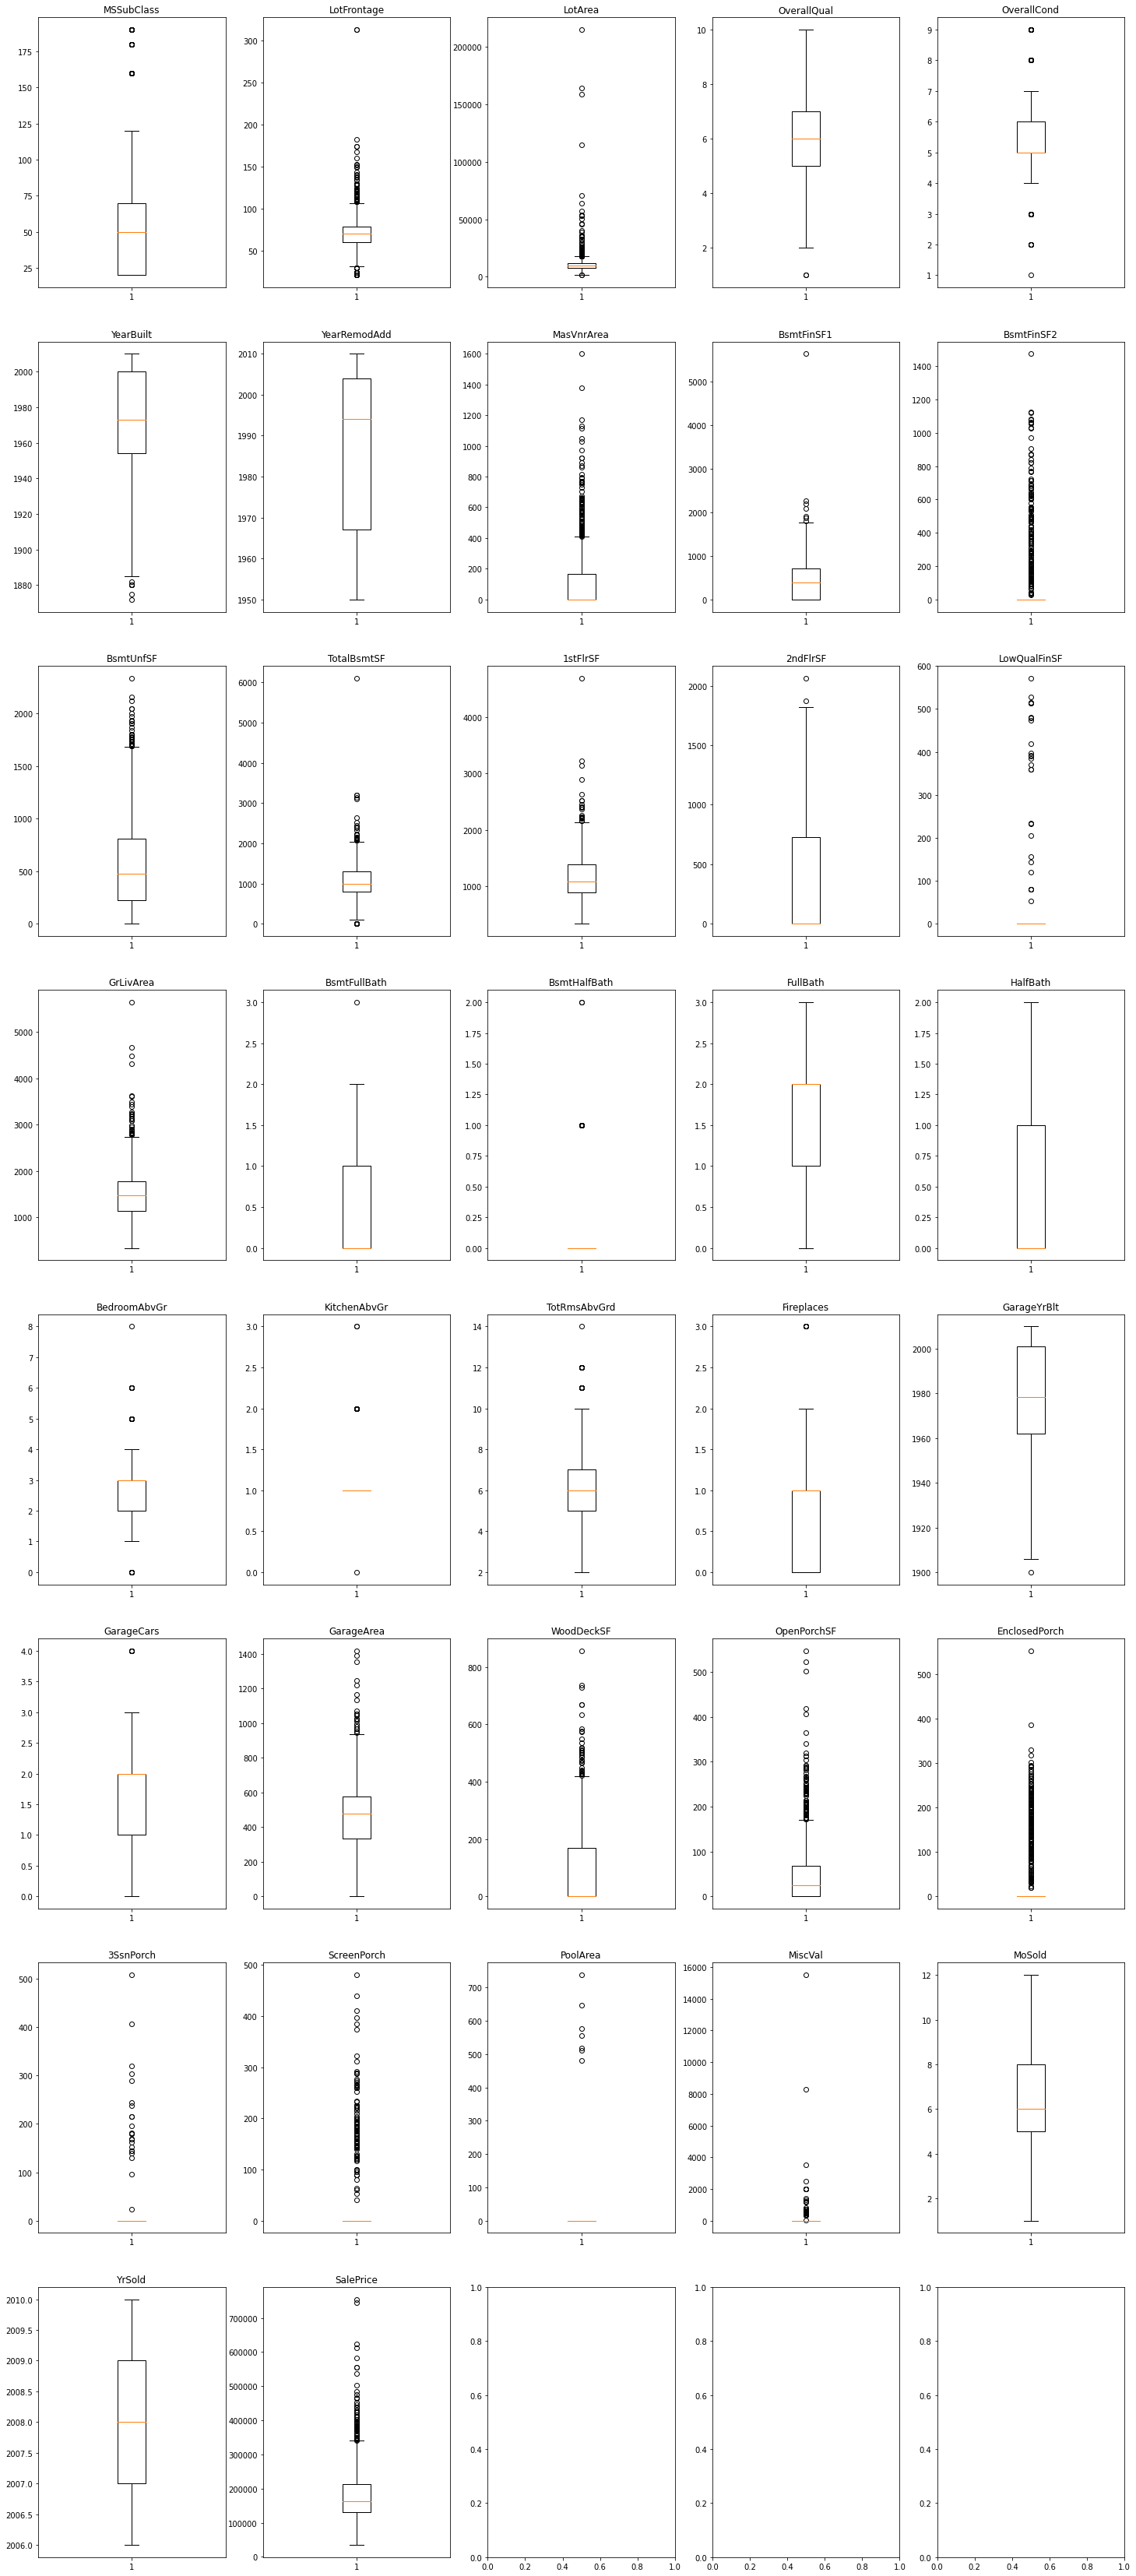

In [104]:
import math
import matplotlib.pyplot as plt

sp_cols = 5
sp_rows = math.ceil(len(numerical_vars)/sp_cols)
sp_row_no = -1
fig = plt.figure(figsize=(25, 60))
ax = fig.subplots(nrows=sp_rows, ncols=sp_cols)
for idx, col in enumerate(numerical_vars):
    if idx%sp_cols == 0:
        sp_row_no += 1
    ax[sp_row_no][idx%sp_cols].boxplot(train_data[col])
    ax[sp_row_no][idx%sp_cols].set_title(col)

plt.show()

#대부분의 데이터에서 이상치가 발견되는데.. 삭제하는 것이 맞는지는 추후 판단

## 데이터 표준화 및 차원 축소

In [105]:
from adptools.VariableSelector import VariableSelector

ind_vars = numerical_vars.remove(dep_var)
selector = VariableSelector(numerical_vars, dep_var, train_data)
selected_vars = selector.forward_selection()

Alert! Too many x variables! (less than 30 variables are recommended)
It will may occur some errors!


후보 독립변수들 : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


전진선택법 선택변수 : 
['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'MSSubClass', 'YearBuilt', 'BedroomAbvGr', 'OverallCond', 'LotArea', 'MasVnrArea', 'BsmtFullBath', 'TotRmsAbvGrd', 'WoodDeckSF', 'ScreenPorch', 'TotalBsmtSF', 'YearRemodAdd', 'KitchenAbvGr', 'Fireplaces', 'FullBath']




In [113]:
#범주형 변수를 더미 변수로 변환
dms = pd.get_dummies(train_data[categorical_vars])
df = pd.concat([train_data[selected_vars], dms], axis=1)
df

,OverallQual,GrLivArea,BsmtFinSF1,GarageCars,MSSubClass,YearBuilt,BedroomAbvGr,OverallCond,LotArea,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,1710,706,2,60,2003,3,5,8450,196.0,...,0,0,0,1,0,0,0,0,1,0
1,6,1262,978,2,20,1976,3,8,9600,0.0,...,0,0,0,1,0,0,0,0,1,0
2,7,1786,486,2,60,2001,3,5,11250,162.0,...,0,0,0,1,0,0,0,0,1,0
3,7,1717,216,3,70,1915,3,5,9550,0.0,...,0,0,0,1,1,0,0,0,0,0
4,8,2198,655,3,60,2000,4,5,14260,350.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,0,2,60,1999,3,5,7917,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,6,2073,790,2,20,1978,3,6,13175,119.0,...,0,0,0,1,0,0,0,0,1,0
1457,7,2340,275,1,70,1941,4,9,9042,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,5,1078,49,1,20,1950,2,6,9717,0.0,...,0,0,0,1,0,0,0,0,1,0


In [114]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df) # x객체에 x를 표준화한 데이터를 저장
df = pd.DataFrame(x, columns=df.columns)
df[dep_var] = train_data[dep_var]
df

,OverallQual,GrLivArea,BsmtFinSF1,GarageCars,MSSubClass,YearBuilt,BedroomAbvGr,OverallCond,LotArea,MasVnrArea,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.651479,0.370333,0.575425,0.311725,0.073375,1.050994,0.163779,-0.517200,-0.207142,0.511418,...,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,208500
1,-0.071836,-0.482512,1.171992,0.311725,-0.872563,0.156734,0.163779,2.179628,-0.091886,-0.574410,...,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,181500
2,0.651479,0.515013,0.092907,0.311725,0.073375,0.984752,0.163779,-0.517200,0.073480,0.323060,...,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,223500
3,0.651479,0.383659,-0.499274,1.650307,0.309859,-1.863632,0.163779,-0.517200,-0.096897,-0.574410,...,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995,140000
4,1.374795,1.299326,0.463568,1.650307,0.073375,0.951632,1.390023,-0.517200,0.375148,1.364570,...,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.250402,-0.973018,0.311725,0.073375,0.918511,0.163779,-0.517200,-0.260560,-0.574410,...,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,175000
1456,-0.071836,1.061367,0.759659,0.311725,-0.872563,0.222975,0.163779,0.381743,0.266407,0.084843,...,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,210000
1457,0.651479,1.569647,-0.369871,-1.026858,0.309859,-1.002492,1.390023,3.078570,-0.147810,-0.574410,...,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,266500
1458,-0.795151,-0.832788,-0.865548,-1.026858,-0.872563,-0.704406,-1.062465,0.381743,-0.080160,-0.574410,...,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,142125


In [121]:
from adptools.pca import Reducer
ind_vars = df.columns.to_list()
ind_vars.remove(dep_var)
reducer = Reducer(ind_vars, dep_var, df, n_components=10)
# reducer.scree_plot(dpi=120)
# principal_df = reducer.principal_df
# principal_df

## 여러 모델로 돌려보기

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[ind_vars], df[dep_var], test_size=0.2)

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale

model = RandomForestRegressor()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

pred = pd.DataFrame(data=predicted, columns=["predict"])
pred[dep_var] = y_test.to_list()
pred["predict_scaled"] = minmax_scale(pred["predict"], (pred["predict"].min(), pred["predict"].max()))
pred["residual"] = pred[dep_var] - pred["predict_scaled"]

display(pred)
pred.describe()

,predict,SalePrice,predict_scaled,residual
0,240983.38,225000,240983.38,-15983.38
1,137025.21,124000,137025.21,-13025.21
2,257295.00,265979,257295.00,8684.00
3,169857.68,188700,169857.68,18842.32
4,93165.33,94000,93165.33,834.67
...,...,...,...,...
287,122849.33,112000,122849.33,-10849.33
288,128973.50,130500,128973.50,1526.50
289,169393.64,145000,169393.64,-24393.64
290,396698.83,315000,396698.83,-81698.83


,predict,SalePrice,predict_scaled,residual
count,292.000000,292.000000,292.000000,292.000000
mean,181354.125411,180626.917808,181354.125411,-727.207603
std,75236.798845,81304.947286,75236.798845,22275.683852
min,72689.750000,55000.000000,72689.750000,-87266.260000
25%,131023.267500,129750.000000,131023.267500,-11653.702500
50%,162472.515000,164000.000000,162472.515000,-148.845000
75%,212286.540000,213000.000000,212286.540000,10311.022500
max,535303.550000,625000.000000,535303.550000,117886.450000


In [173]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(pred[dep_var], pred["predict"])
mse

495035586.0434637

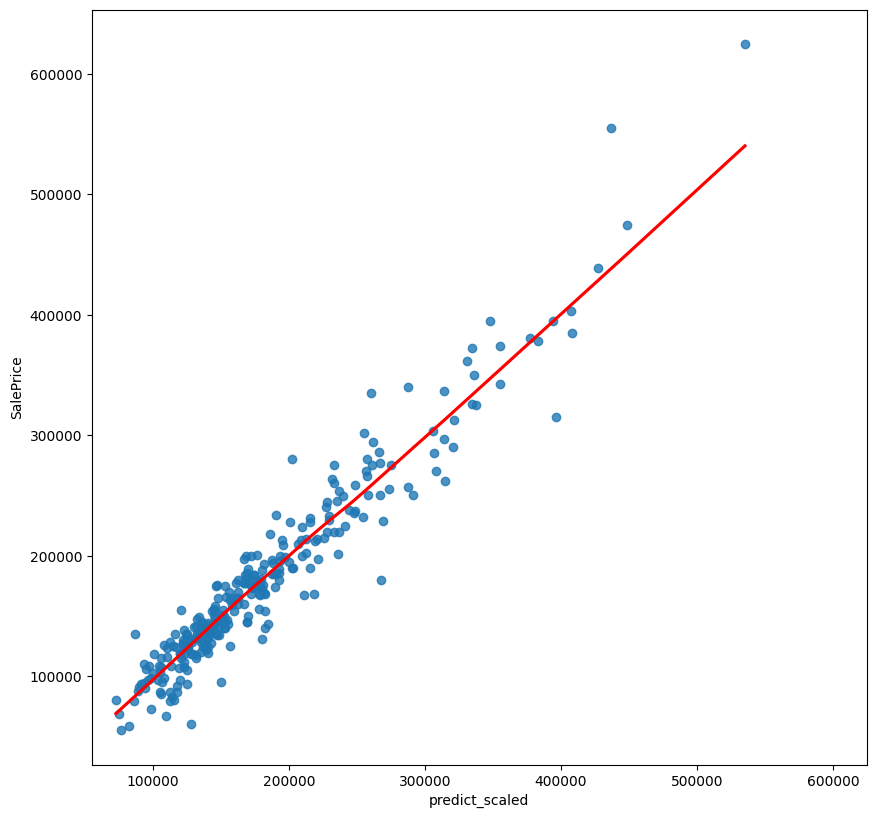

In [177]:
plt.figure(figsize=(10, 10), dpi=100)
sns.regplot(x=pred["predict_scaled"], y=pred[dep_var], lowess=True, line_kws={'color': 'red'})
plt.xlim((pred[dep_var].min(), pred[dep_var].max()))
# plt.scatter(pred["predict"], pred[dep_var])
plt.show()

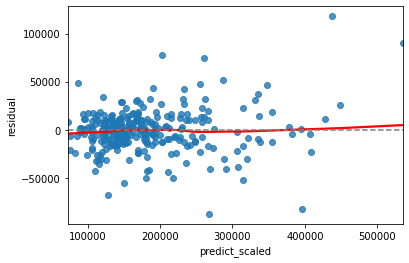

In [179]:
import seaborn as sns

sns.regplot(x=pred["predict_scaled"], y=pred["residual"], lowess=True, line_kws={'color': 'red'})
plt.plot([pred["predict_scaled"].min(), pred["predict_scaled"].max()], [0, 0], '--', color='grey')
plt.show()

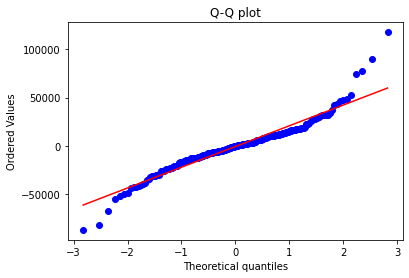

In [180]:
from scipy import stats
stats.probplot(pred["residual"], plot=plt)
plt.title("Q-Q plot")
plt.show()

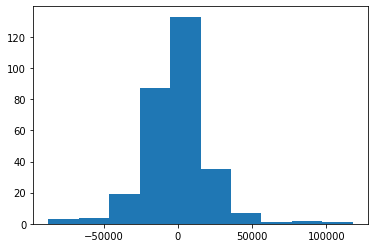

In [181]:
plt.hist(pred["residual"])
plt.show()

In [189]:
challenge_df = pd.read_csv("data/test.csv")

null_true_cols = []
for col in challenge_df.columns:
    null_cnt = len(challenge_df[challenge_df[col].isnull() == True])
    if col in numerical_vars and null_cnt > 0:
        print("결측치 {} : {}".format(col, null_cnt))
        null_true_cols.append(col)

for col in null_true_cols:
    this_mean = challenge_df[col].mean()
    challenge_df.loc[(challenge_df[col].isnull()), col] = this_mean

dms = pd.get_dummies(challenge_df[categorical_vars])
challenge_df = pd.concat([challenge_df[selected_vars], dms], axis=1)
x = StandardScaler().fit_transform(challenge_df) # x객체에 x를 표준화한 데이터를 저장
challenge_df = pd.DataFrame(x, columns=challenge_df.columns)

결측치 LotFrontage : 227
결측치 MasVnrArea : 15
결측치 BsmtFinSF1 : 1
결측치 BsmtFinSF2 : 1
결측치 BsmtUnfSF : 1
결측치 TotalBsmtSF : 1
결측치 BsmtFullBath : 2
결측치 BsmtHalfBath : 2
결측치 GarageYrBlt : 78
결측치 GarageCars : 1
결측치 GarageArea : 1


In [193]:
len(challenge_df.columns), len(X_train.columns)

for t_col in X_train.columns:
    if t_col not in challenge_df.columns:
        challenge_df[t_col] = 0

len(challenge_df.columns), len(X_train.columns)

challenge_predicted = model.predict(challenge_df)
challenge_predicted

array([127690.08, 160417.  , 197469.5 , ..., 161151.65, 131751.5 ,
       235617.87])

In [201]:
submit_df = pd.DataFrame()
submit_df["Id"] = challenge_df.index + 1461
submit_df[dep_var] = challenge_predicted
submit_df
submit_df.to_csv("210914_hrdkdh_submission.csv", index=False)

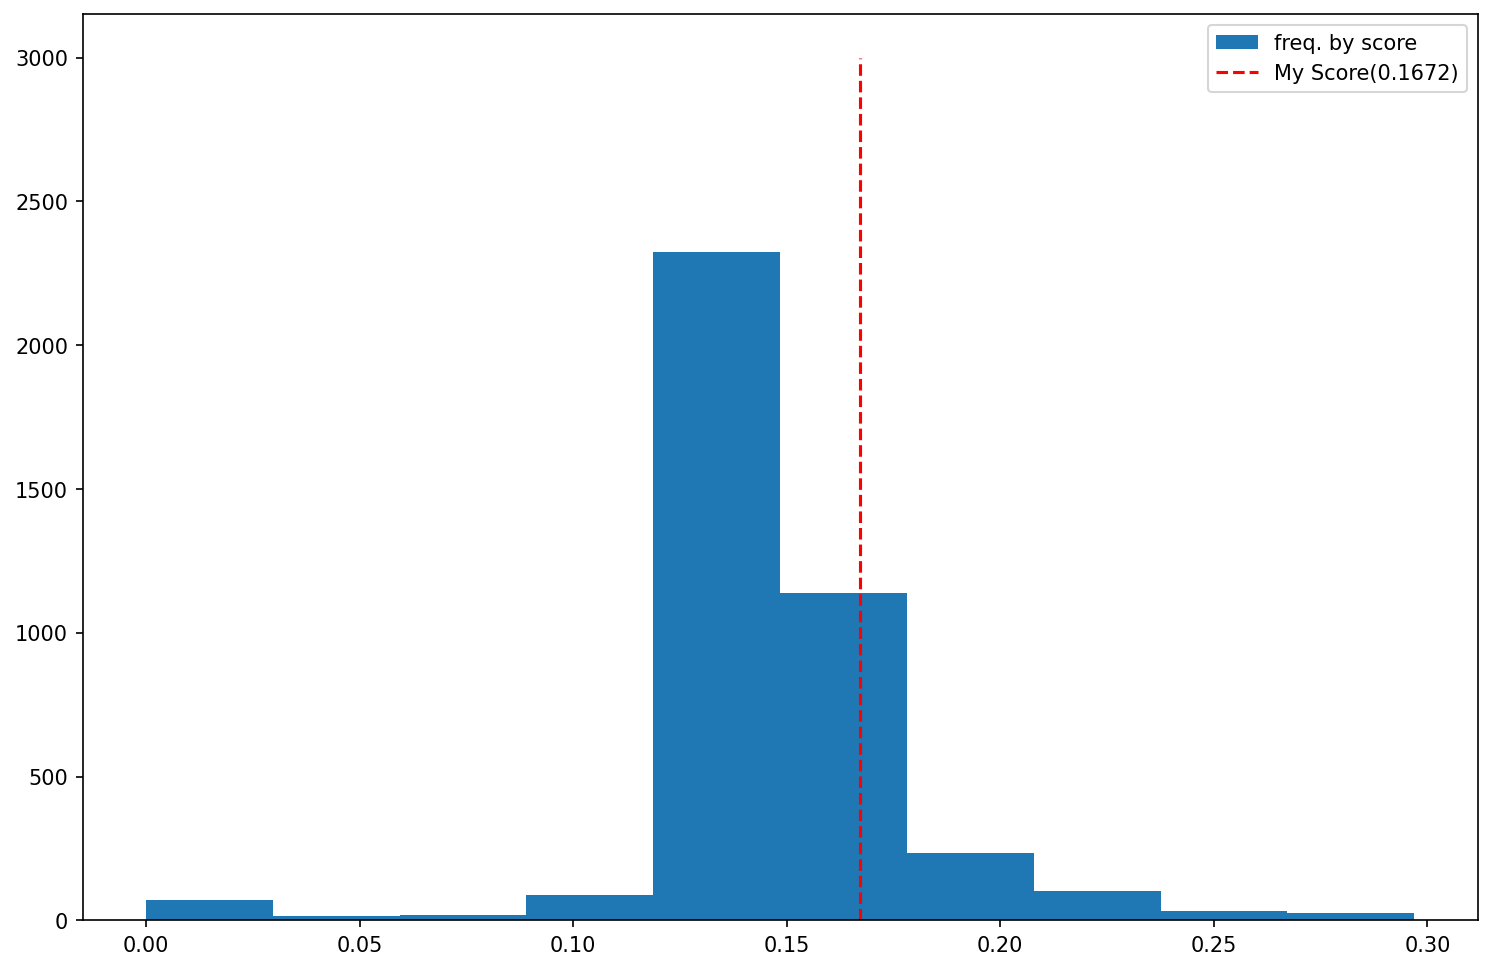

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ldr_brd = pd.read_csv("/Users/hrdkdh/Downloads/house-prices-advanced-regression-techniques-publicleaderboard.csv")

ldr_brd_drop_list = ldr_brd[(ldr_brd["Score"] > 0.3)].index
ldr_brd.drop(index=ldr_brd_drop_list, inplace=True)
my_score = ldr_brd.loc[(ldr_brd["TeamName"] == "hrdkdh"), "Score"].values[0]

plt.figure(figsize=(12, 8), dpi=150)
plt.hist(ldr_brd.iloc[:-1, 3], label="freq. by score")
plt.vlines(my_score, 0, 3000, colors="red", linestyles="dashed", label="My Score({:.4f})".format(my_score))
plt.legend()
plt.show()